In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Configurações de visualização
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

print("ANÁLISE EXPLORATÓRIA - DEPRESSÃO EM ESTUDANTES")
print("")

ANÁLISE EXPLORATÓRIA - DEPRESSÃO EM ESTUDANTES



In [ ]:
# 1. CARREGAMENTO E INSPEÇÃO INICIAL DOS DADOS

print("\n[1] CARREGANDO DADOS...")
df = pd.read_csv('../data/student_depression_dataset.csv')

print(f"\n✓ Dataset carregado com sucesso!")
print(f"  → Total de registros: {len(df)}")
print(f"  → Total de variáveis: {len(df.columns)}")

print("\n[2] PRIMEIRAS LINHAS DO DATASET:")
print(df.head())

print("\n[3] INFORMAÇÕES GERAIS:")
print(df.info())

print("\n[4] TIPOS DE DADOS:")
print(df.dtypes.value_counts())


[1] CARREGANDO DADOS...

✓ Dataset carregado com sucesso!
  → Total de registros: 27901
  → Total de variáveis: 18

[2] PRIMEIRAS LINHAS DO DATASET:
   id  Gender   Age           City Profession  Academic Pressure  \
0   2    Male  33.0  Visakhapatnam    Student                5.0   
1   8  Female  24.0      Bangalore    Student                2.0   
2  26    Male  31.0       Srinagar    Student                3.0   
3  30  Female  28.0       Varanasi    Student                3.0   
4  32  Female  25.0         Jaipur    Student                4.0   

   Work Pressure  CGPA  Study Satisfaction  Job Satisfaction  \
0            0.0  8.97                 2.0               0.0   
1            0.0  5.90                 5.0               0.0   
2            0.0  7.03                 5.0               0.0   
3            0.0  5.59                 2.0               0.0   
4            0.0  8.13                 3.0               0.0   

        Sleep Duration Dietary Habits   Degree  \
0     

In [7]:
# 2. ANÁLISE DE QUALIDADE DOS DADOS

print("\n" + "="*60)
print("ANÁLISE DE QUALIDADE DOS DADOS")
print("="*60)

print("\n[5] VALORES AUSENTES:")
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
missing_df = pd.DataFrame({
    'Coluna': missing.index,
    'Valores Ausentes': missing.values,
    'Percentual (%)': missing_pct.values
})
missing_df = missing_df[missing_df['Valores Ausentes'] > 0].sort_values('Valores Ausentes', ascending=False)

if len(missing_df) > 0:
    print(missing_df.to_string(index=False))
else:
    print("✓ Não há valores ausentes no dataset!")

print("\n[6] VALORES DUPLICADOS:")
duplicados = df.duplicated().sum()
print(f"  → Total de linhas duplicadas: {duplicados}")
if duplicados > 0:
    print(f"  → Percentual: {(duplicados/len(df))*100:.2f}%")


ANÁLISE DE QUALIDADE DOS DADOS

[5] VALORES AUSENTES:
✓ Não há valores ausentes no dataset!

[6] VALORES DUPLICADOS:
  → Total de linhas duplicadas: 0


In [8]:
# 3. ESTATÍSTICAS DESCRITIVAS

print("\n" + "="*60)
print("ESTATÍSTICAS DESCRITIVAS")
print("="*60)

print("\n[7] VARIÁVEIS NUMÉRICAS:")
print(df.describe())

print("\n[8] VARIÁVEIS CATEGÓRICAS:")
categorical_cols = df.select_dtypes(include=['object']).columns
if len(categorical_cols) > 0:
    for col in categorical_cols:
        print(f"\n{col}:")
        print(df[col].value_counts())
else:
    print("Não há variáveis categóricas no dataset")



ESTATÍSTICAS DESCRITIVAS

[7] VARIÁVEIS NUMÉRICAS:
                  id           Age  Academic Pressure  Work Pressure  \
count   27901.000000  27901.000000       27901.000000   27901.000000   
mean    70442.149421     25.822300           3.141214       0.000430   
std     40641.175216      4.905687           1.381465       0.043992   
min         2.000000     18.000000           0.000000       0.000000   
25%     35039.000000     21.000000           2.000000       0.000000   
50%     70684.000000     25.000000           3.000000       0.000000   
75%    105818.000000     30.000000           4.000000       0.000000   
max    140699.000000     59.000000           5.000000       5.000000   

               CGPA  Study Satisfaction  Job Satisfaction  Work/Study Hours  \
count  27901.000000        27901.000000      27901.000000      27901.000000   
mean       7.656104            2.943837          0.000681          7.156984   
std        1.470707            1.361148          0.044394     


ANÁLISE DA VARIÁVEL TARGET - DEPRESSÃO


[9] DISTRIBUIÇÃO DA VARIÁVEL TARGET (Depression):
Depression
1    16336
0    11565
Name: count, dtype: int64

Proporção:
Depression
1    58.549873
0    41.450127
Name: proportion, dtype: float64


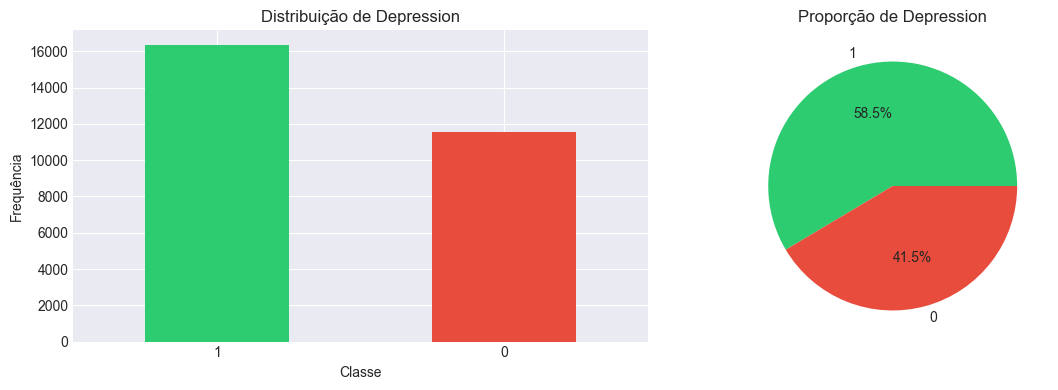


Razão de desbalanceamento: 1.41
Dataset relativamente balanceado.


In [9]:
# 4. ANÁLISE DA VARIÁVEL TARGET (DEPRESSÃO)

print("\n" + "="*60)
print("ANÁLISE DA VARIÁVEL TARGET - DEPRESSÃO")
print("")

# Identifica coluna de depressão (pode ser Depression, depression, target, etc.)
depression_col = [col for col in df.columns if 'depress' in col.lower() or 'target' in col.lower()]

if depression_col:
    dep_col = depression_col[0]
    print(f"\n[9] DISTRIBUIÇÃO DA VARIÁVEL TARGET ({dep_col}):")
    print(df[dep_col].value_counts())
    print(f"\nProporção:")
    print(df[dep_col].value_counts(normalize=True) * 100)
    
    # Visualização
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    
    # Gráfico de barras
    df[dep_col].value_counts().plot(kind='bar', ax=axes[0], color=['#2ecc71', '#e74c3c'])
    axes[0].set_title(f'Distribuição de {dep_col}')
    axes[0].set_xlabel('Classe')
    axes[0].set_ylabel('Frequência')
    axes[0].tick_params(axis='x', rotation=0)
    
    # Gráfico de pizza
    df[dep_col].value_counts().plot(kind='pie', ax=axes[1], autopct='%1.1f%%', 
                                     colors=['#2ecc71', '#e74c3c'])
    axes[1].set_title(f'Proporção de {dep_col}')
    axes[1].set_ylabel('')
    
    plt.tight_layout()
    plt.savefig('../visualizations/distribuicao_target.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # Verifica desbalanceamento
    value_counts = df[dep_col].value_counts()
    ratio = value_counts.max() / value_counts.min()
    print(f"\nRazão de desbalanceamento: {ratio:.2f}")
    if ratio > 3:
        print("Dataset desbalanceado! Considerar técnicas de balanceamento.")
    else:
        print("Dataset relativamente balanceado.")
else:
    print("Coluna de depressão não identificada automaticamente")


ANÁLISE DE CORRELAÇÕES


[10] MATRIZ DE CORRELAÇÃO (9 variáveis numéricas):


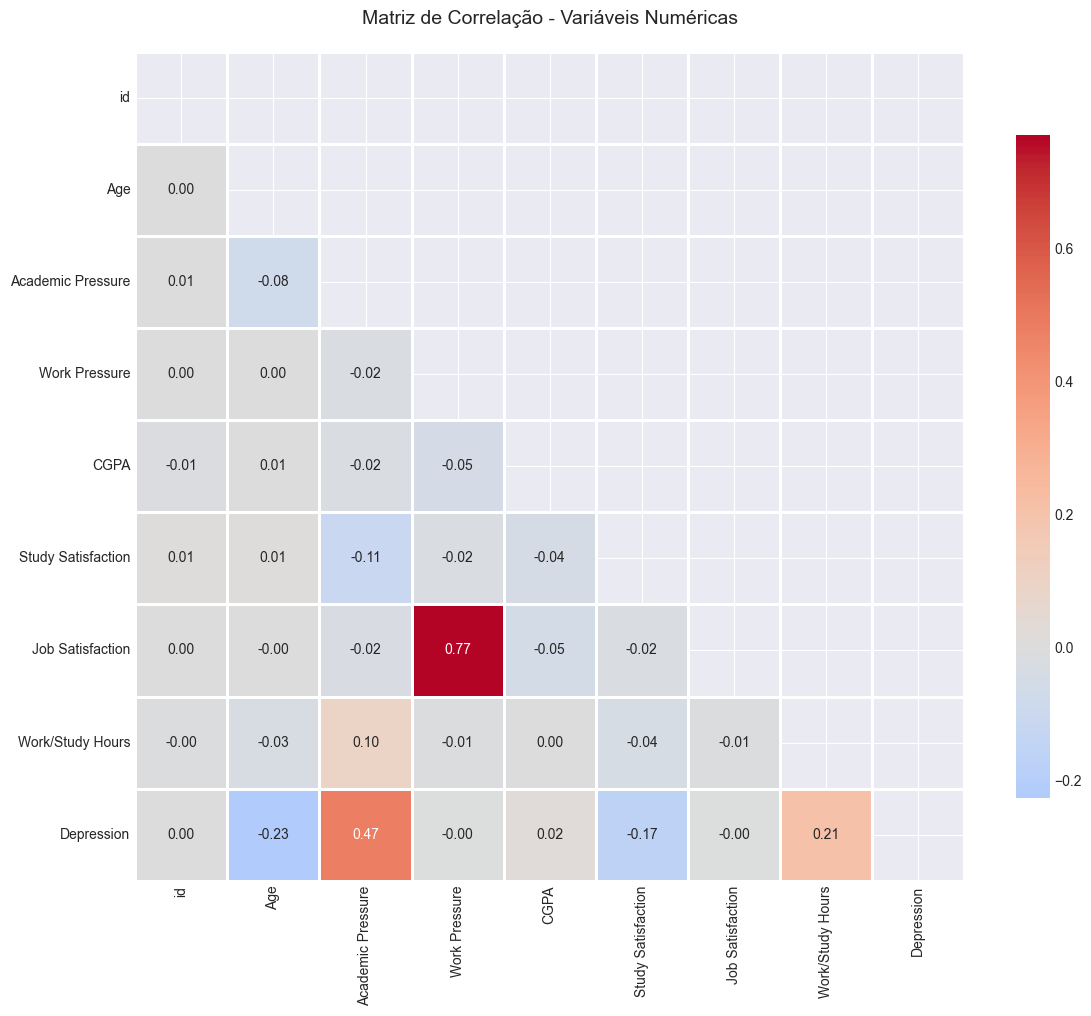


[11] CORRELAÇÕES COM Depression (ordenadas):
Academic Pressure     0.474835
Work/Study Hours      0.208563
CGPA                  0.022210
id                    0.000923
Work Pressure        -0.003351
Job Satisfaction     -0.003482
Study Satisfaction   -0.167971
Age                  -0.226422
Name: Depression, dtype: float64

TOP 5 CORRELAÇÕES POSITIVAS:
Academic Pressure    0.474835
Work/Study Hours     0.208563
CGPA                 0.022210
id                   0.000923
Work Pressure       -0.003351
Name: Depression, dtype: float64

TOP 5 CORRELAÇÕES NEGATIVAS:
id                    0.000923
Work Pressure        -0.003351
Job Satisfaction     -0.003482
Study Satisfaction   -0.167971
Age                  -0.226422
Name: Depression, dtype: float64


In [10]:
# 5. ANÁLISE DE CORRELAÇÕES

print("\n" + "="*60)
print("ANÁLISE DE CORRELAÇÕES")
print("")

# Seleciona apenas colunas numéricas
numeric_cols = df.select_dtypes(include=[np.number]).columns

if len(numeric_cols) > 1:
    print(f"\n[10] MATRIZ DE CORRELAÇÃO ({len(numeric_cols)} variáveis numéricas):")
    
    correlation_matrix = df[numeric_cols].corr()
    
    # Visualização
    plt.figure(figsize=(12, 10))
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
    sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt='.2f', 
                cmap='coolwarm', center=0, square=True, linewidths=1,
                cbar_kws={"shrink": 0.8})
    plt.title('Matriz de Correlação - Variáveis Numéricas', fontsize=14, pad=20)
    plt.tight_layout()
    plt.savefig('../visualizations/matriz_correlacao.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # Correlações mais fortes com a variável target
    if depression_col:
        print(f"\n[11] CORRELAÇÕES COM {dep_col} (ordenadas):")
        target_corr = correlation_matrix[dep_col].drop(dep_col).sort_values(ascending=False)
        print(target_corr)
        
        # Top correlações positivas e negativas
        print(f"\nTOP 5 CORRELAÇÕES POSITIVAS:")
        print(target_corr.head(5))
        
        print(f"\nTOP 5 CORRELAÇÕES NEGATIVAS:")
        print(target_corr.tail(5))



DISTRIBUIÇÕES DAS VARIÁVEIS


[12] VISUALIZANDO DISTRIBUIÇÕES DE 9 VARIÁVEIS:


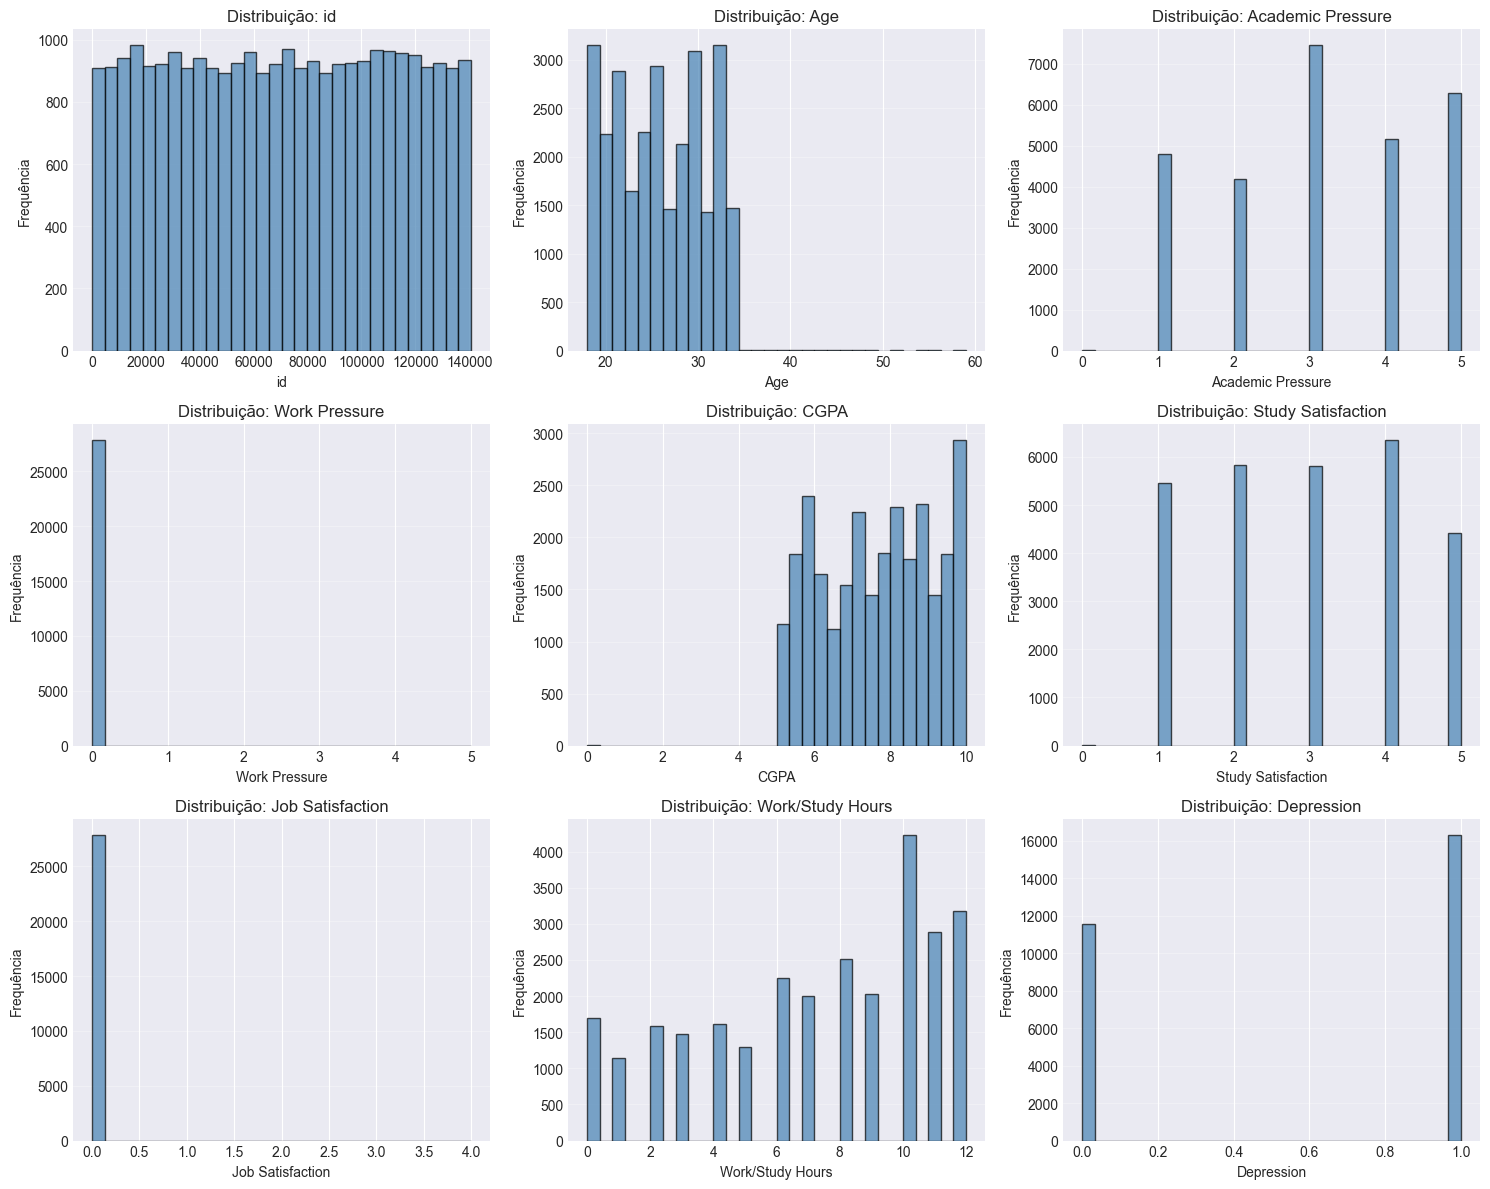

In [11]:
# 6. DISTRIBUIÇÕES DAS VARIÁVEIS NUMÉRICAS

print("\n" + "="*60)
print("DISTRIBUIÇÕES DAS VARIÁVEIS")
print("")

if len(numeric_cols) > 0:
    print(f"\n[12] VISUALIZANDO DISTRIBUIÇÕES DE {len(numeric_cols)} VARIÁVEIS:")
    
    n_cols = 3
    n_rows = (len(numeric_cols) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
    axes = axes.flatten() if n_rows > 1 else [axes]
    
    for idx, col in enumerate(numeric_cols):
        if idx < len(axes):
            axes[idx].hist(df[col].dropna(), bins=30, color='steelblue', alpha=0.7, edgecolor='black')
            axes[idx].set_title(f'Distribuição: {col}')
            axes[idx].set_xlabel(col)
            axes[idx].set_ylabel('Frequência')
            axes[idx].grid(axis='y', alpha=0.3)
    
    
    for idx in range(len(numeric_cols), len(axes)):
        fig.delaxes(axes[idx])
    
    plt.tight_layout()
    plt.savefig('../visualizations/distribuicoes_variaveis.png', dpi=300, bbox_inches='tight')
    plt.show()


In [12]:
# 7. ANÁLISE DE OUTLIERS

print("\n" + "="*60)
print("ANÁLISE DE OUTLIERS")
print("")

if len(numeric_cols) > 0:
    print(f"\n[13] DETECÇÃO DE OUTLIERS (Método IQR):")
    
    outliers_info = []
    
    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
        n_outliers = len(outliers)
        pct_outliers = (n_outliers / len(df)) * 100
        
        outliers_info.append({
            'Variável': col,
            'N° Outliers': n_outliers,
            'Percentual': f'{pct_outliers:.2f}%',
            'Limite Inferior': f'{lower_bound:.2f}',
            'Limite Superior': f'{upper_bound:.2f}'
        })
    
    outliers_df = pd.DataFrame(outliers_info)
    print(outliers_df.to_string(index=False))
    
    # Boxplots
    if len(numeric_cols) <= 8:
        n_cols_box = 4
        n_rows_box = (len(numeric_cols) + n_cols_box - 1) // n_cols_box
        
        fig, axes = plt.subplots(n_rows_box, n_cols_box, figsize=(16, n_rows_box * 3))
        axes = axes.flatten() if n_rows_box > 1 else [axes]
        
        for idx, col in enumerate(numeric_cols):
            if idx < len(axes):
                axes[idx].boxplot(df[col].dropna())
                axes[idx].set_title(f'{col}')
                axes[idx].set_ylabel('Valor')
                axes[idx].grid(axis='y', alpha=0.3)
        
        for idx in range(len(numeric_cols), len(axes)):
            fig.delaxes(axes[idx])
        
        plt.tight_layout()
        plt.savefig('../visualizations/boxplots_outliers.png', dpi=300, bbox_inches='tight')
        plt.show()



ANÁLISE DE OUTLIERS


[13] DETECÇÃO DE OUTLIERS (Método IQR):
          Variável  N° Outliers Percentual Limite Inferior Limite Superior
                id            0      0.00%       -71129.50       211986.50
               Age           12      0.04%            7.50           43.50
 Academic Pressure            0      0.00%           -1.00            7.00
     Work Pressure            3      0.01%            0.00            0.00
              CGPA            9      0.03%            2.35           12.87
Study Satisfaction            0      0.00%           -1.00            7.00
  Job Satisfaction            8      0.03%            0.00            0.00
  Work/Study Hours            0      0.00%           -5.00           19.00
        Depression            0      0.00%           -1.50            2.50


In [13]:
# 8. INSIGHTS FINAIS

print("\n" + "="*60)
print("RESUMO E INSIGHTS")
print("")

print(f"""
RESUMO DA ANÁLISE EXPLORATÓRIA:

1. DADOS:
   {len(df)} registros analisados
   {len(df.columns)} variáveis disponíveis
   {len(numeric_cols)} variáveis numéricas
   {len(categorical_cols)} variáveis categóricas

2. QUALIDADE:
   Valores ausentes: {'Sim' if len(missing_df) > 0 else 'Não'}
   Duplicados: {duplicados} registros
""")

print("\nAnálise exploratória concluída!")
print("")


RESUMO E INSIGHTS


RESUMO DA ANÁLISE EXPLORATÓRIA:

1. DADOS:
   27901 registros analisados
   18 variáveis disponíveis
   9 variáveis numéricas
   9 variáveis categóricas

2. QUALIDADE:
   Valores ausentes: Não
   Duplicados: 0 registros


Análise exploratória concluída!

